In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/FundamentosCienciaDatos/books.csv')
df.head()

,title,product_type,description,category,UPC,price_incl_tax,price_excl_tax,tax,availability,n_reviews,rating,image_url
0,It's Only the Himalayas,Books,"“Wherever you go, whatever you do, just . . . ...",Travel,a22124811bfa8350,£45.17,£45.17,£0.00,In stock (19 available),0,star-rating Two,https://books.toscrape.com/media/cache/6d/41/6...
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,Books,Acclaimed travel writer Rick Antonson sets his...,Travel,ce60436f52c5ee68,£49.43,£49.43,£0.00,In stock (15 available),0,star-rating Four,https://books.toscrape.com/media/cache/fe/8a/f...
2,See America: A Celebration of Our National Par...,Books,To coincide with the 2016 centennial anniversa...,Travel,f9705c362f070608,£48.87,£48.87,£0.00,In stock (14 available),0,star-rating Three,https://books.toscrape.com/media/cache/c7/1a/c...
3,Vagabonding: An Uncommon Guide to the Art of L...,Books,With a new foreword by Tim Ferriss •There’s no...,Travel,1809259a5a5f1d8d,£36.94,£36.94,£0.00,In stock (8 available),0,star-rating Two,https://books.toscrape.com/media/cache/ca/30/c...
4,Under the Tuscan Sun,Books,A CLASSIC FROM THE BESTSELLING AUTHOR OF UNDER...,Travel,a94350ee74deaa07,£37.33,£37.33,£0.00,In stock (7 available),0,star-rating Three,https://books.toscrape.com/media/cache/45/21/4...


In [ ]:
df_libros_sin_categoria = df[df["category"].isin(["Default","Add a comment"])]

In [ ]:
df_libros_sin_categoria = df_libros_sin_categoria.drop("category",axis=1)
df_libros_sin_categoria = df_libros_sin_categoria[["title","description"]]
df_libros_sin_categoria.to_csv("libros_sin_categoria.csv", index=False)
files.download('libros_sin_categoria.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Remover duplicados

In [ ]:
df.drop_duplicates(inplace=True)

## Valores nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1000 non-null   object
 1   product_type    1000 non-null   object
 2   description     998 non-null    object
 3   category        1000 non-null   object
 4   UPC             1000 non-null   object
 5   price_incl_tax  1000 non-null   object
 6   price_excl_tax  1000 non-null   object
 7   tax             1000 non-null   object
 8   availability    1000 non-null   object
 9   n_reviews       1000 non-null   int64 
 10  rating          1000 non-null   object
 11  image_url       1000 non-null   object
dtypes: int64(1), object(11)
memory usage: 93.9+ KB


In [ ]:
df[df["description"].isnull()]

,title,product_type,description,category,UPC,price_incl_tax,price_excl_tax,tax,availability,n_reviews,rating,image_url
89,Alice in Wonderland (Alice's Adventures in Won...,Books,NaN,Classics,cd2a2a70dd5d176d,£55.53,£55.53,£0.00,In stock (1 available),0,star-rating One,https://books.toscrape.com/media/cache/99/df/9...
237,The Bridge to Consciousness: I'm Writing the B...,Books,NaN,Default,efc3768127714ec3,£32.00,£32.00,£0.00,In stock (15 available),0,star-rating Three,https://books.toscrape.com/media/cache/39/c7/3...


La descripción realmente no aportará al modelo, por lo que la opción más conveniente sería tener una columna con la longitud de la descripción y/o análisis de sentimiento.

In [ ]:
df["description"] = df["description"].fillna("")
df["description_length"] = df["description"].apply(lambda x: len(x.split()))

In [ ]:
df["product_type"].value_counts()

,count
product_type,
Books,1000


La columna es constante, así que no aporta. Podemos retirarla

In [ ]:
df = df.drop("product_type", axis=1)

La columna de UPC es única para cada registro, lo cual no aporta para el análisis posterior

In [ ]:
df = df.drop("UPC", axis=1)

Lo mismo sucede con image_url

In [ ]:
df["n_reviews"].value_counts()

,count
n_reviews,
0,1000


Y lo mismo sucede con n_reviews.

In [ ]:
df["tax"].value_counts()

,count
tax,
£0.00,1000


Y lo mismo con tax

In [ ]:
df = df.drop(["image_url", "n_reviews","tax"], axis=1)

Como tax es cero en todos los casos, se puede quitar la columna

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               1000 non-null   object
 1   description         1000 non-null   object
 2   category            1000 non-null   object
 3   price_incl_tax      1000 non-null   object
 4   price_excl_tax      1000 non-null   object
 5   availability        1000 non-null   object
 6   rating              1000 non-null   object
 7   description_length  1000 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


## Inconsistencias en tipos de datos

In [ ]:
columnas_divisa = ["price_incl_tax","price_excl_tax"]

def clean_currency(value):
  return float(value.strip().replace("£",""))


for columna in columnas_divisa:
  df[columna] = df[columna].apply(clean_currency)


In [ ]:
df["tax"] = df["price_incl_tax"] - df["price_excl_tax"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1000 non-null   object 
 1   description         1000 non-null   object 
 2   category            1000 non-null   object 
 3   price_incl_tax      1000 non-null   float64
 4   price_excl_tax      1000 non-null   float64
 5   availability        1000 non-null   object 
 6   rating              1000 non-null   object 
 7   description_length  1000 non-null   int64  
 8   tax                 1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [ ]:
df.head()

,title,description,category,price_incl_tax,price_excl_tax,availability,rating,description_length,tax
0,It's Only the Himalayas,"“Wherever you go, whatever you do, just . . . ...",Travel,45.17,45.17,In stock (19 available),star-rating Two,230,0.0
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,Acclaimed travel writer Rick Antonson sets his...,Travel,49.43,49.43,In stock (15 available),star-rating Four,284,0.0
2,See America: A Celebration of Our National Par...,To coincide with the 2016 centennial anniversa...,Travel,48.87,48.87,In stock (14 available),star-rating Three,145,0.0
3,Vagabonding: An Uncommon Guide to the Art of L...,With a new foreword by Tim Ferriss •There’s no...,Travel,36.94,36.94,In stock (8 available),star-rating Two,329,0.0
4,Under the Tuscan Sun,A CLASSIC FROM THE BESTSELLING AUTHOR OF UNDER...,Travel,37.33,37.33,In stock (7 available),star-rating Three,166,0.0


In [ ]:
df["tax"].value_counts()

,count
tax,
0.0,1000


Se verifica que los precios sin tax y con tax son el mismo. Por consiguiente, se puede volver una sola columna, llamada price

In [ ]:
df["price"] = df["price_excl_tax"]
df = df.drop(columns=["price_excl_tax","price_incl_tax","tax"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1000 non-null   object 
 1   description         1000 non-null   object 
 2   category            1000 non-null   object 
 3   availability        1000 non-null   object 
 4   rating              1000 non-null   object 
 5   description_length  1000 non-null   int64  
 6   price               1000 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [ ]:
df["availability"] = df["availability"].str.extract(r'(\d+)').astype(int)

In [ ]:
rating_dict = {"One":1,"Two":2,"Three":3,"Four":4,"Five":5}

def rating_to_number(rating):
  return rating_dict[rating.split(' ')[-1]]

df["rating"] = df["rating"].apply(rating_to_number)

In [ ]:
df.head()

,title,description,category,availability,rating,description_length,price
0,It's Only the Himalayas,"“Wherever you go, whatever you do, just . . . ...",Travel,19,2,230,45.17
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,Acclaimed travel writer Rick Antonson sets his...,Travel,15,4,284,49.43
2,See America: A Celebration of Our National Par...,To coincide with the 2016 centennial anniversa...,Travel,14,3,145,48.87
3,Vagabonding: An Uncommon Guide to the Art of L...,With a new foreword by Tim Ferriss •There’s no...,Travel,8,2,329,36.94
4,Under the Tuscan Sun,A CLASSIC FROM THE BESTSELLING AUTHOR OF UNDER...,Travel,7,3,166,37.33


## Creación de etiqueta de sentimiento

In [ ]:
!pip -q install nltk

In [ ]:
import nltk
nltk.download('punkt'); nltk.download('averaged_perceptron_tagger'); nltk.download('vader_lexicon');nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df["title"] = df["title"].str.replace(r'[^\w\s]','',regex=True).apply(lambda x: x.lower())
df["description"] = df["description"].str.replace(r'[^\w\s]','',regex=True).apply(lambda x: x.lower())

In [ ]:
# Inicializar analizador
sia = SentimentIntensityAnalyzer()

# Función para obtener el sentimiento
def analyze_sentiment(text):
    scores = sia.polarity_scores(text)
    return scores['compound']   # valor entre -1 y 1

# Crear columna nueva con puntaje
df["sentiment_score"] = df["description"].apply(analyze_sentiment)

# Clasificar positivo / negativo / neutro
df["sentiment_label"] = df["sentiment_score"].apply(
    lambda x: "positive" if x > 0.05 else ("negative" if x < -0.05 else "neutral")
)

df = df.drop("sentiment_score",axis=1)

In [ ]:
df.head()

,title,description,category,availability,rating,description_length,price,sentiment_label
0,its only the himalayas,wherever you go whatever you do just dont d...,Travel,19,2,230,45.17,positive
1,full moon over noahs ark an odyssey to mount a...,acclaimed travel writer rick antonson sets his...,Travel,15,4,284,49.43,positive
2,see america a celebration of our national park...,to coincide with the 2016 centennial anniversa...,Travel,14,3,145,48.87,positive
3,vagabonding an uncommon guide to the art of lo...,with a new foreword by tim ferriss theres noth...,Travel,8,2,329,36.94,positive
4,under the tuscan sun,a classic from the bestselling author of under...,Travel,7,3,166,37.33,positive


In [ ]:
df["description_length"] = df["description"].apply(lambda x: len(x.split()))

## Manejo de outliers

<Axes: ylabel='price'>

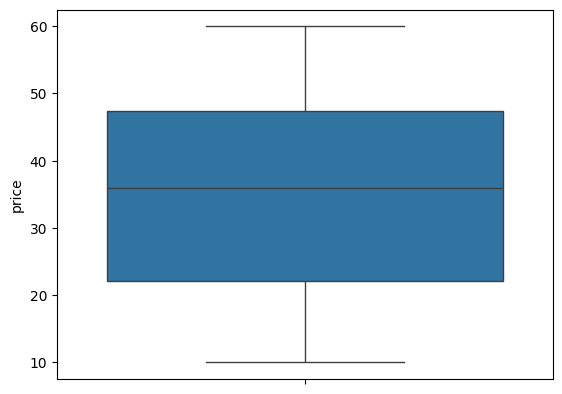

In [ ]:
sns.boxplot(df,y="price")

<Axes: ylabel='description_length'>

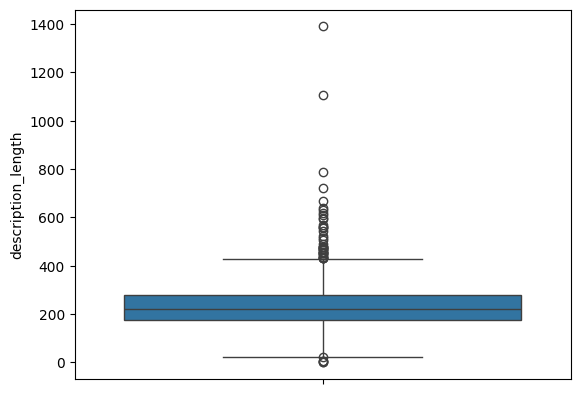

In [ ]:
sns.boxplot(df,y="description_length")

In [ ]:
Q1 = df["description_length"].quantile(0.25)
Q3 = df["description_length"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["description_length"] = df["description_length"].clip(lower=lower_bound,upper=upper_bound)

<Axes: ylabel='description_length'>

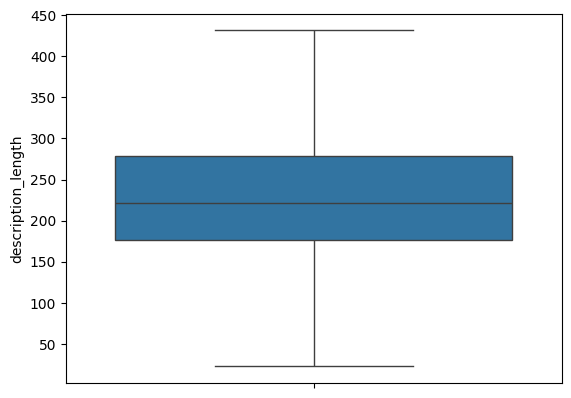

In [ ]:
sns.boxplot(df,y="description_length")

<Axes: ylabel='availability'>

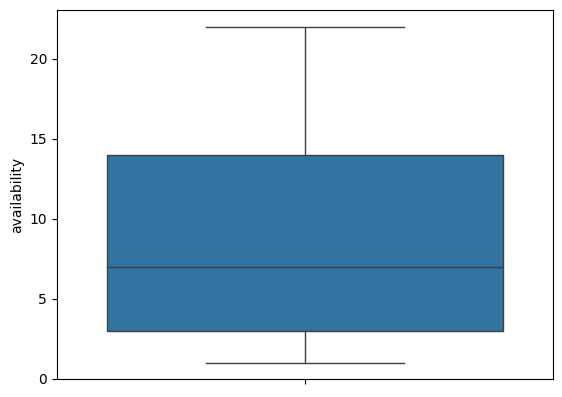

In [ ]:
sns.boxplot(df,y="availability")

In [ ]:
df.to_csv("books_clean.csv", index=False)
files.download('books_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>